<a href="https://colab.research.google.com/github/emichester/08MIAR_Aprendizaje_por_Refuerzo/blob/main/ProyectoPractico/08MIAR_Proyecto_practico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: [Emilio Jesús Hernández Salas](mailto:emiliohersal@gmail.com)
*   Alumno 2: [Javier Rodríguez Juárez](mailto:jr.juarez.79@gmail.com)
*   Alumno 3: [Guillermo Caamaño de Melo](mailto:elguillesise@gmail.com)






## Seleccionar alumno

In [2]:
from ipywidgets.widgets import widget
import ipywidgets as widgets
from IPython.display import display

# my_button = widgets.Button(icon="home")
# display(my_button)

w = widgets.Dropdown(
    options=[('Emilio', 1), ('Javier', 2), ('Guillermo', 3)],
    description='User:',
)
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("SELECT MEMBER OF THE TEAM")
display(w)
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
SELECT MEMBER OF THE TEAM


Dropdown(description='User:', options=(('Emilio', 1), ('Javier', 2), ('Guillermo', 3)), value=1)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [3]:
import os
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/drive'

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
    s = w.get_state()
    user_selection = s['_options_labels'][s['index']]
    if user_selection == 'Emilio':
        drive_root = os.path.join(mount, "MyDrive/ASIGNATURAS/VIU/08MIAR_Aprendizaje_por_Refuerzo/ProyectoPractico")
    elif user_selection == 'Javier':
        drive_root = os.path.join(mount, "MyDrive/ASIGNATURAS/VIU/08MIAR_Aprendizaje_por_Refuerzo/ProyectoPractico")
    elif user_selection == 'Guillermo':
        drive_root = os.path.join(mount, "MyDrive/ASIGNATURAS/VIU/08MIAR_Aprendizaje_por_Refuerzo/ProyectoPractico")
    print("------> ",drive_root)
    
    WEIGHTS_PATH = os.path.join(drive_root, "weights")
    CHECKPOINT_PATH = os.path.join(drive_root, "checkpoints")
    LOGS_PATH = os.path.join(drive_root, "logs")
    os.makedirs(WEIGHTS_PATH, exist_ok=True)
    os.makedirs(CHECKPOINT_PATH, exist_ok=True)
    os.makedirs(LOGS_PATH, exist_ok=True)
else:
    s = w.get_state()
    user_selection = s['_options_labels'][s['index']]
    if user_selection == 'Emilio':
        drive_root = os.path.join("G:\\Mi unidad\\ASIGNATURAS\\VIU\\08MIAR_Aprendizaje_por_Refuerzo\\ProyectoPractico")
    elif user_selection == 'Javier':
        drive_root = os.path.join("G:\\Mi unidad\\ASIGNATURAS\\VIU\\08MIAR_Aprendizaje_por_Refuerzo\\ProyectoPractico")
    elif user_selection == 'Guillermo':
        drive_root = os.path.join("G:\\Mi unidad\\ASIGNATURAS\\VIU\\08MIAR_Aprendizaje_por_Refuerzo\\ProyectoPractico")
    print("------> ",drive_root)
    
    WEIGHTS_PATH = os.path.join(drive_root, "weights")
    CHECKPOINT_PATH = os.path.join(drive_root, "checkpoints")
    LOGS_PATH = os.path.join(drive_root, "logs")
    os.makedirs(WEIGHTS_PATH, exist_ok=True)
    os.makedirs(CHECKPOINT_PATH, exist_ok=True)
    os.makedirs(LOGS_PATH, exist_ok=True)

------>  G:\Mi unidad\ASIGNATURAS\VIU\08MIAR_Aprendizaje_por_Refuerzo\ProyectoPractico


---
### 1.3. Montar carpeta de datos local (solo Colab)

In [4]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

Archivos en el directorio: 
['.ipynb_checkpoints', '08MIAR_Proyecto_practico.ipynb']


---
### 1.4. Instalar librerías necesarias

In [4]:
if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.8
else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.3 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654618 sha256=ef39383cd260bce947d6576b70be622f37c214506be39d4b1f398235284647a9
  Stored in directory: /root/.cache/pip/wheels/af/4b/74/fcfc8238472c34d7f96508a63c962ff3ac9485a9a4137afd4e
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.13.0 requires cloudpick

---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [5]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute, MaxPooling2D, GlobalAveragePooling2D \
                                    ,LeakyReLU , BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

#### Configuración base

- [SpaceInvaders Gym Documentation](https://www.gymlibrary.dev/environments/atari/space_invaders/)

In [7]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [8]:
print("El tamaño del espacio de acciones es: ",nb_actions," y son las siguientes:")

El tamaño del espacio de acciones es:  6  y son las siguientes:


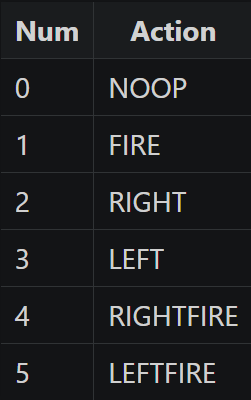

In [9]:
print("Formato de las observaciones:")
env.observation_space

Formato de las observaciones:


Box(0, 255, (210, 160, 3), uint8)

In [10]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        # 3 dimensiones de forma obligatoria -> RGB
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L') # gray
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

#### 1. Implementación de la red neuronal

##### CNN por Mnih et al. (2015), con modificaciones

In [9]:
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE # (batch, width, height) -> también se podría utilizar una LSTM (batch temporal)
model = Sequential()
print(K.image_data_format())
if K.image_data_format() == 'channels_last':
    # (width, height, channels)
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_data_format() == 'channels_first':
    # (channels, width, height)
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

# Cambiamos los strides por MaxPooling2D
model.add(Convolution2D(32, (8, 8)))
model.add(MaxPooling2D((3, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3)))
model.add(MaxPooling2D((1, 1)))
model.add(Activation('relu'))
# Cambiamos el Flatten por GlobalAveragePooling2D
# model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

channels_last
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 4)         0         
                                                                 
 conv2d (Conv2D)             (None, 77, 77, 32)        8224      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 activation (Activation)     (None, 25, 25, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                      

###### Resultados con esta arquitectura

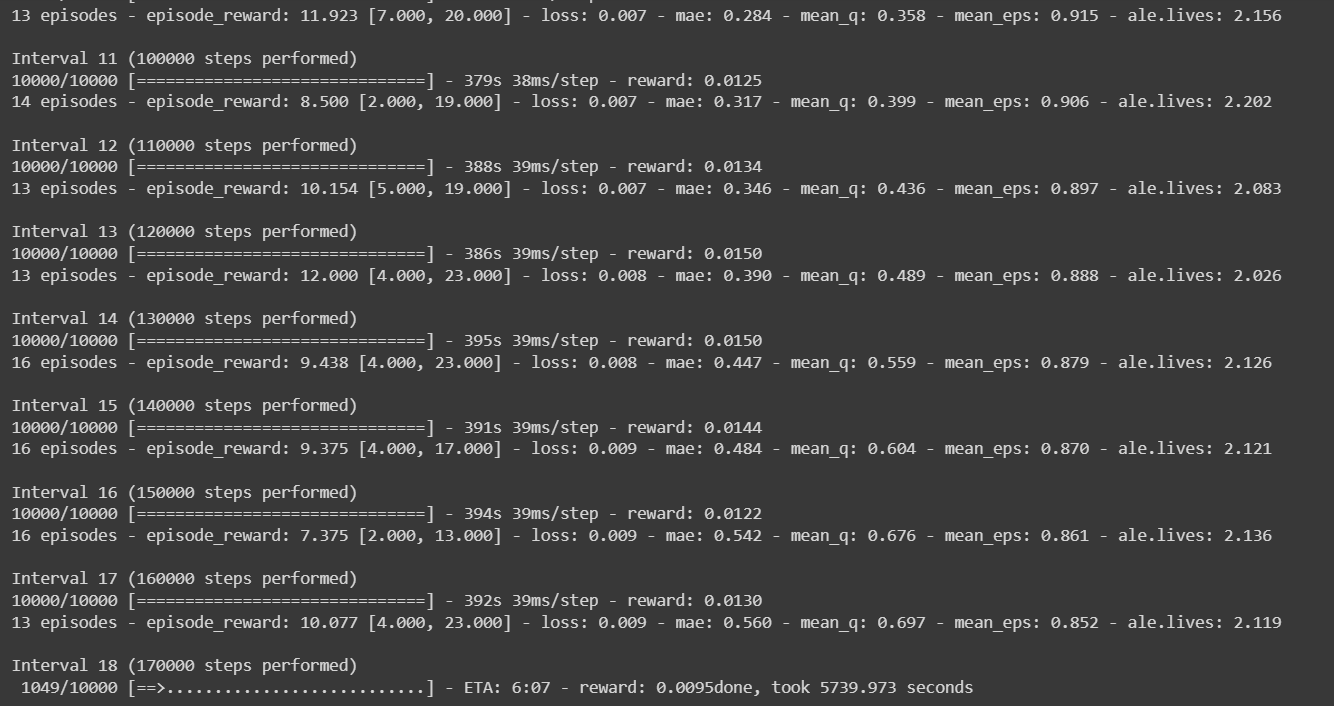

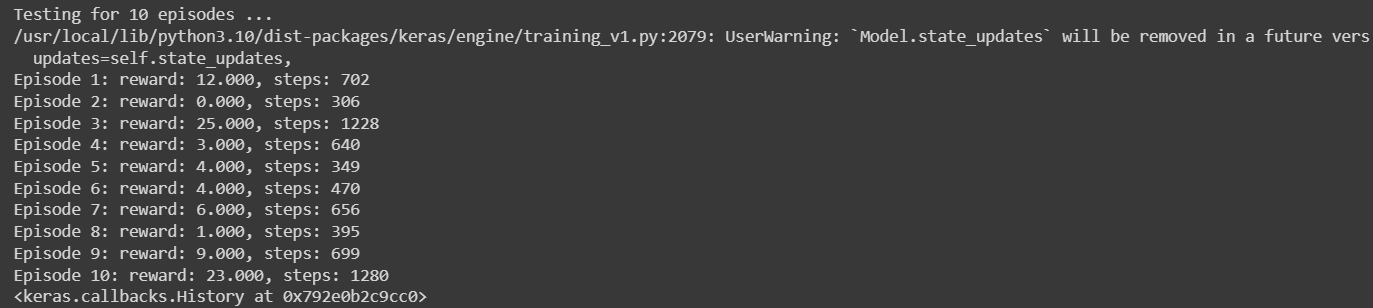

##### Mejoras sobre la red anterior

In [11]:
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE # (batch, width, height) -> también se podría utilizar una LSTM (batch temporal)
model = Sequential()
print(K.image_data_format())
if K.image_data_format() == 'channels_last':
    # (width, height, channels)
    model.add(Permute((2, 3, 1), input_shape=input_shape))
elif K.image_data_format() == 'channels_first':
    # (channels, width, height)
    model.add(Permute((1, 2, 3), input_shape=input_shape))
else:
    raise RuntimeError('Unknown image_dim_ordering.')

# Block 1
model.add(Convolution2D(32, (8, 8), kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((3, 3)))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Block 2
model.add(Convolution2D(64, (3, 3), kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Block 3
model.add(Convolution2D(64, (3, 3), kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((1, 1)))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Top Model
model.add(GlobalAveragePooling2D())
model.add(Dense(nb_actions))
model.add(Activation('linear'))

print(model.summary())

channels_last
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute (Permute)            (None, 84, 84, 4)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 77, 77, 32)        8224      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 25, 25, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 25, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 32)        0         
____________________________________

#### 2. Implementación de la solución DQN

In [12]:
###########  VALORES VISTOS EN CLASE  ###########
# LEARNING_RATE = .00025
# MEMORY_SIZE = 1000000

# SHCHEDULER_STEPS = 1000000 # steps en los que aplica el scheduler
# WARMUP_STEPS = 25000 # steps de calentamiento
# MODEL_UPDATE = 10000 # cada estos steps se actualiza el modelo
# MODEL_CHECKPOINT_STEPS = 250000 # cada estos steps se guarda un checkpoint del modelo
# TRAIN_STEPS = 1750000 # número de steps de entrenamiento
# LOG_INTERVAL = 10000

LEARNING_RATE = .00025
MEMORY_SIZE = 1000000

SHCHEDULER_STEPS = 1000000 # steps en los que aplica el scheduler
WARMUP_STEPS = 25000 # steps de calentamiento
MODEL_UPDATE = 10000 # cada estos steps se actualiza el modelo
MODEL_CHECKPOINT_STEPS = 50000 # cada estos steps se guarda un checkpoint del modelo
TRAIN_STEPS = 1750000 # número de steps de entrenamiento
LOG_INTERVAL = 10000

In [13]:
memory = SequentialMemory(limit=MEMORY_SIZE, window_length=WINDOW_LENGTH)
processor = AtariProcessor()

In [14]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', # scheduler del epsilon
                              value_max=1., value_min=.1, value_test=.05, # empieza en 1, hasta 0.1 y en test 0.05
                              nb_steps=SHCHEDULER_STEPS) # steps en los que el scheduler aplica

In [15]:
dqn = DQNAgent(model=model, nb_actions=nb_actions, policy=policy,
               memory=memory, processor=processor,
               nb_steps_warmup=WARMUP_STEPS, # steps de calentamiento
               gamma=.99, # discount reward
               target_model_update=MODEL_UPDATE, #actualización cada 10000 steps
               train_interval=4)
dqn.compile(Adam(learning_rate=LEARNING_RATE), metrics=['mae'])

#### Training

In [ ]:
weights_filename = os.path.join(WEIGHTS_PATH, 'dqn_{}_weights.h5f'.format(env_name))
checkpoint_weights_filename = os.path.join(CHECKPOINT_PATH, 'dqn_' + env_name + '_weights_{step}.h5f')
log_filename = os.path.join(LOGS_PATH, 'dqn_{}_log.json'.format(env_name))

callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=MODEL_CHECKPOINT_STEPS)]
callbacks += [FileLogger(log_filename, interval=100)]

dqn.fit(env, callbacks=callbacks, nb_steps=TRAIN_STEPS, log_interval=LOG_INTERVAL, visualize=False)

dqn.save_weights(weights_filename, overwrite=True)

Training for 1750000 steps ...
Interval 1 (0 steps performed)


C:\Users\usuario\anaconda3\envs\miar_rl\lib\site-packages\tensorflow\python\keras\engine\training.py:2424: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


10000/10000 [==============================] - 41s 4ms/step - reward: 0.0131
15 episodes - episode_reward: 8.333 [2.000, 13.000] - ale.lives: 2.045

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 38s 4ms/step - reward: 0.0135
14 episodes - episode_reward: 9.429 [4.000, 14.000] - ale.lives: 2.068

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 157s 16ms/step - reward: 0.0132
15 episodes - episode_reward: 8.733 [2.000, 19.000] - loss: 0.065 - mae: 0.095 - mean_q: 0.185 - mean_eps: 0.975 - ale.lives: 2.089

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 278s 28ms/step - reward: 0.0123
15 episodes - episode_reward: 8.800 [1.000, 22.000] - loss: 0.013 - mae: 0.181 - mean_q: 0.283 - mean_eps: 0.969 - ale.lives: 2.219

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 270s 27ms/step - reward: 0.0122
15 episodes - episode_reward: 8.200 [3.000, 18.000] - loss:

#### Testing

In [30]:
# Testing part to calculate the mean reward
weights_filename = os.path.join(WEIGHTS_PATH, 'dqn_{}_weights.h5f'.format(env_name))
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...
Episode 1: reward: 5.000, steps: 423
Episode 2: reward: 8.000, steps: 525
Episode 3: reward: 5.000, steps: 430
Episode 4: reward: 9.000, steps: 642
Episode 5: reward: 7.000, steps: 683
Episode 6: reward: 11.000, steps: 972
Episode 7: reward: 17.000, steps: 983
Episode 8: reward: 11.000, steps: 639
Episode 9: reward: 12.000, steps: 1074
Episode 10: reward: 4.000, steps: 470


In [14]:
# Testing part to calculate the mean reward
checkpoint_weights_filename = os.path.join(CHECKPOINT_PATH, 'dqn_' + env_name + f'_weights_{150000}.h5f')
dqn.load_weights(checkpoint_weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 12.000, steps: 702
Episode 2: reward: 0.000, steps: 306
Episode 3: reward: 25.000, steps: 1228
Episode 4: reward: 3.000, steps: 640
Episode 5: reward: 4.000, steps: 349
Episode 6: reward: 4.000, steps: 470
Episode 7: reward: 6.000, steps: 656
Episode 8: reward: 1.000, steps: 395
Episode 9: reward: 9.000, steps: 699
Episode 10: reward: 23.000, steps: 1280


#### 3. Justificación de los parámetros seleccionados y de los resultados obtenidos

---